##### Author: [Perez Ogayo](https://linkedin.com/in/peresogayo)
##### Acknowledgements: [Juste Nyirimana](https://www.linkedin.com/in/juste-nyirimana-25a534144/) for providing the starter code

# UmojaHack Rwanda: Expresso Churn Prediction Challenge

## Before you begin 
### A note about the data

Make sure the Train.csv, Test.csv and SampleSubmission.csv is in the same folder as this notebook, or you can change the path in the relevant cell. Also make sure the names match.

The output file is called "mean_encode_XGB_submission2_final.csv" and will be saved in the directory that contains this 
notebook.

### If you want to save time
If you are only interested in the output file, skip the cell where we train on a portion of the train set- It takes about 30 min(Intel i7). Only run the cell where we train on the full dataset.

### Make sure the packages used here are installed
One package that is used here that most people don't have is *missingno*. Confirm that it is installed, if not, install it.

## Table of Contents:
&nbsp;&nbsp;1. [LOADING THE DATA](#1)
   
&nbsp;&nbsp;2. [EXPLORING THE DATA](#2)   

&nbsp;&nbsp;3. [BUILDING SOME MODELS](#3)   

&nbsp;&nbsp;4. [GENERATING THE PREDICTIONS FOR THE TEST SET](#4)

# LOADING THE DATA

In [1]:
##importing packages
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import missingno as msno

Next, load the datasets.

In [2]:
#reading in the data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [4]:
train.info()#quite the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


Each row represents a customer. There are 2.15 customers in the training set.

In [5]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  REGULARITY      380127 non-null  int64  
 13  TOP_PACK        221348 non-null  object 
 14  FREQ_TOP_PACK   221348 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 43.5+ MB


#### Exploring missing values

In [7]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total > 0]

,Total,Percent
ZONE2,2017224,0.936481
ZONE1,1984327,0.921208
TIGO,1290016,0.598880
DATA_VOLUME,1060433,0.492298
TOP_PACK,902594,0.419022
FREQ_TOP_PACK,902594,0.419022
ORANGE,895248,0.415612
REGION,849299,0.394280
ON_NET,786675,0.365208
MONTANT,756739,0.351310


In [8]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data.Total > 0]

,Total,Percent
ZONE2,356051,0.936663
ZONE1,350266,0.921445
TIGO,227001,0.597171
DATA_VOLUME,187040,0.492046
TOP_PACK,158779,0.417700
FREQ_TOP_PACK,158779,0.417700
ORANGE,157230,0.413625
REGION,149728,0.393889
ON_NET,138514,0.364389
FREQUENCE_RECH,133055,0.350028


In [9]:
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [10]:
test.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
count,247072.000000,247072.000000,252754.000000,252754.000000,252754.000000,193087.000000,241613.000000,222897.000000,153126.000000,29861.000000,24076.000000,380127.000000,221348.000000
mean,5524.958826,11.519853,5499.680468,1833.232443,13.957963,3346.095454,278.806310,95.193008,23.052088,8.164663,7.655300,28.081699,9.261584
std,7116.320922,13.242743,7195.093138,2398.360570,14.652660,12002.653047,874.253933,203.950776,65.042688,48.857605,33.021478,22.289094,12.268907
min,25.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,259.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000
75%,7350.000000,16.000000,7351.000000,2450.000000,19.000000,2884.000000,157.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000
max,201500.000000,146.000000,200965.000000,66988.000000,91.000000,977796.000000,26786.000000,6345.000000,3708.000000,4215.000000,1649.000000,62.000000,390.000000


In [11]:
train.describe(exclude = np.number)#no duplicates in user_id, MRG is useless

,user_id,REGION,TENURE,MRG,TOP_PACK
count,2154048,1304749,2154048,2154048,1251454
unique,2154048,14,8,1,140
top,5daee1d16912bb27f7b2b8e2d652da821db29ea5,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,513271,2043201,2154048,317802


In [12]:
test.describe(exclude = np.number)

,user_id,REGION,TENURE,MRG,TOP_PACK
count,380127,230399,380127,380127,221348
unique,380127,14,8,1,102
top,5b54f50a22f3cda2f1cf1aa94622cb4cd74c47de,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,90615,360350,380127,56038


Let's delete the 'MRG' column since it consists of a single value. Also, let's delete colums 'ZONE2' and 'ZONE1' since they have so many missing values. 

In [13]:
train = train.drop(['MRG', 'ZONE2', 'ZONE1'], axis = 1)
test = test.drop(['MRG', 'ZONE2', 'ZONE1'], axis = 1)

In [14]:
train.REGION.unique()

array(['FATICK', nan, 'DAKAR', 'LOUGA', 'TAMBACOUNDA', 'KAOLACK', 'THIES',
       'SAINT-LOUIS', 'KOLDA', 'KAFFRINE', 'DIOURBEL', 'ZIGUINCHOR',
       'MATAM', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [17]:
print("Shape of trainset: "+ str(train.shape))
print()
print("Shape of testset: "+str(test.shape))

Shape of trainset: (2154048, 16)

Shape of testset: (380127, 15)


# EXPLORING THE DATA

Let's start by looking at the distribution of our target variable.

CHURN
0    1750062
1     403986
dtype: int64


Text(0, 0.5, 'Frequency')

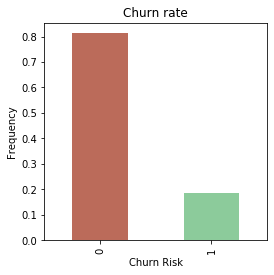

In [18]:
print(train.groupby(['CHURN']).size())
#bar chart to show distribution of the target variable
n_obs = train.shape[0]
#index = ['No','Yes']
churn_plot = train['CHURN'].value_counts().div(n_obs).plot(kind='bar',figsize=(4,4),title="Churn rate", color=['#BB6B5A','#8CCB9B'])
churn_plot.set_xlabel("Churn Risk")
churn_plot.set_ylabel("Frequency")

It is imbalanced, with more than 80% of customers staying. Next, let's take a look at our features. We have a mix of continous and categorical features. 

Let's begin with the categorical features and investigate how the churn rate differ across the various levels of each categorical feature.

In [19]:
def attrition_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of churn rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (train[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax, color = ['g', 'r'])
    ax.invert_yaxis()
    ax.legend().remove()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


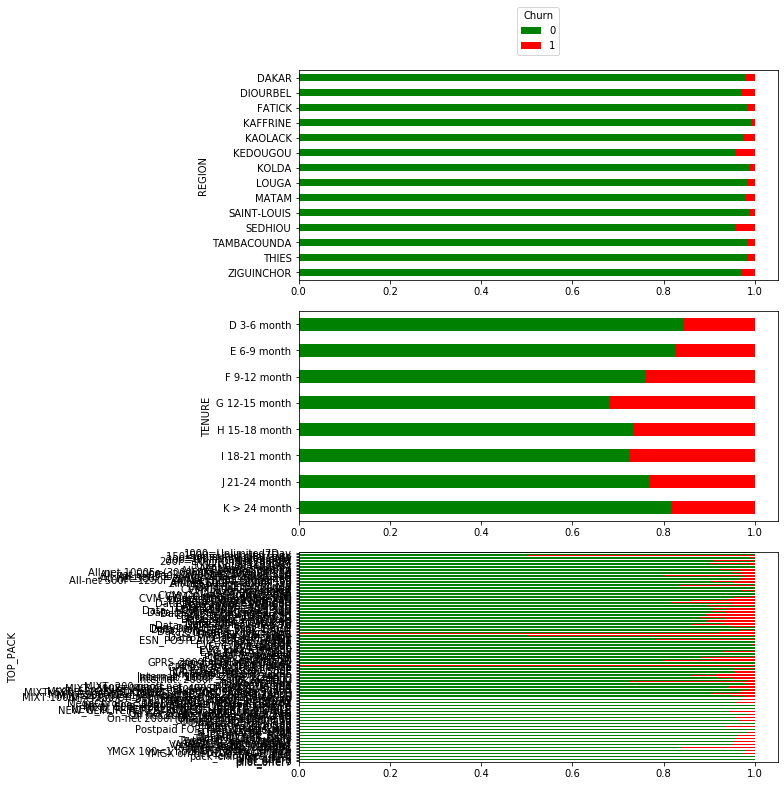

In [20]:
cols_to_plot = [
    'REGION',
    'TENURE',
    "TOP_PACK"
]

fig, ax = plt.subplots(
    len(cols_to_plot), 1, figsize=(11,11)
)
for idx, col in enumerate(cols_to_plot):
    attrition_rate_plot(
        col, 'CHURN', train, ax=ax[idx]
    )

ax[0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='Churn'
)

fig.tight_layout()

It looks like customers with tenure between 12 and 15 months have the highest churn rate while new customers have the lowest.

Now, let's look at the relationship between the recharge amount and the monthly revenue

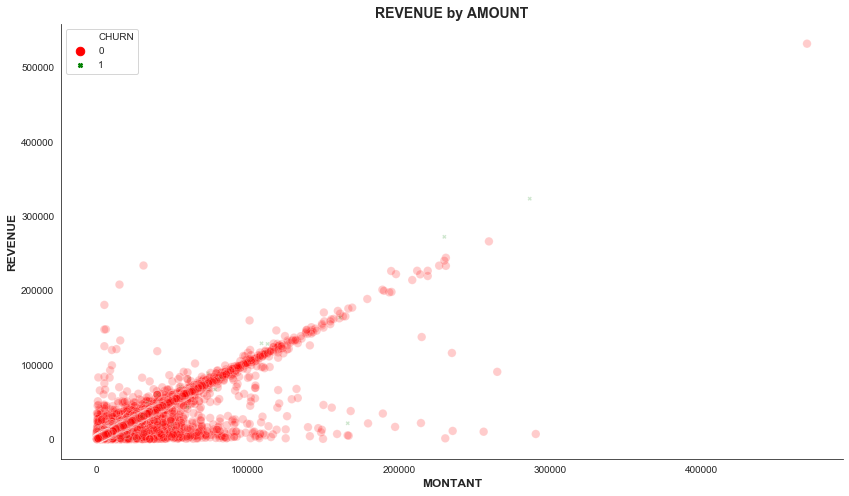

In [21]:
# Set initial plot options
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create scatterplot
sns.scatterplot(x = "MONTANT", 
                y = "REVENUE", 
                # Group by and change dot style and  by CHURN
                hue = "CHURN",
                size = "CHURN",  
                style = "CHURN", 
                data = train, 
                # Change color of hue categories
                palette = ["r", "g"],
                alpha = 0.2)

# Despine plot
sns.despine()
# Final formatting touches
plt.xlabel("MONTANT", fontsize = 12, fontweight = "semibold")
plt.ylabel("REVENUE", fontsize = 12, fontweight = "semibold")
plt.title("REVENUE by AMOUNT", fontsize = 14, fontweight = "semibold")
plt.show()

There seems to be some correlation between the two and also there's some outliers. Outliers can create bias in a model's performance. Should we keep them or remove them? I will let you decide.

# BUILDING SOME MODELS

We will train a model using the [XGBoostClassifier](https://xgboost.readthedocs.io/). 

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_SEED = 123    # Set a random seed for reproducibility!

We preprocess the numeric features for better performance.
We used the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), it transforms each feature such that its distribution has a mean value of 0 and a standard deviation of 1.

 To take care of missing values, we used the [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) function.

We encapsulated everything into a pipeline . 

### Feature Preprocessing

We started with splitting the train data in train and validation set as we were  going to use mean encodings.To avoid leakages, we have to split first.
Because the train data was unbalanced, we used stratified splitting so that the split was representative

In [33]:
X_train, X_eval, y_train, y_eval = train_test_split(
    train.drop(['user_id', 'CHURN'], axis = 1),
    train.CHURN,
    test_size=0.33,
    shuffle=True,
    stratify=train.CHURN,
    random_state=RANDOM_SEED
)

### Mean Encoding for Categorical Data


Mean encoding kills two birds with a stone, encoding the categorical data and creating a new feature that has a correlation with the target variable

In [34]:
X_tr=X_train.copy()
X_tr["CHURN"]=y_train

X_val=X_eval.copy()
X_val["CHURN"]=y_eval

cols=["REGION", 'TENURE', 'TOP_PACK'] # These were the categorical columns
for col in cols:
  means=X_tr.groupby(col).CHURN.mean()
  X_tr[col+" mean_target"]=X_train[col].map(means)
  X_val[col+" mean_target"]=X_eval[col].map(means)

The same preprocessing is also done on the full dataset and the test set that we will use

In [29]:
full_tr=train.copy()

X_test=test.copy()

cols=["REGION", 'TENURE', 'TOP_PACK']
for col in cols:
  means=full_tr.groupby(col).CHURN.mean()
  full_tr[col+" mean_target"]=train[col].map(means)
  X_test[col+" mean_target"]=X_test[col].map(means)

In [30]:
drop_cols=["REGION",'TENURE', 'TOP_PACK']  # We drop these columns as they are now replaced by the mean encoded ones

In [35]:
for col in drop_cols:

    X_train.drop(col, inplace=True,axis=1)
    X_train[col+" mean_target"]=X_tr[col+" mean_target"]

    X_eval.drop(col, inplace=True, axis=1)
    X_eval[col+" mean_target"]=X_val[col+" mean_target"]

In [36]:
for col in drop_cols:
    full_tr.drop(col, inplace=True,axis=1)
    X_test.drop(col, inplace=True, axis=1)
  

Let's inspect the REGION mean_target

In [65]:
X_val["TOP_PACK mean_target"].value_counts()

0.032308    104635
0.018833     50240
0.063044     38313
0.045777     28202
0.041923     22477
             ...  
0.133333         5
0.100000         3
0.333333         2
0.200000         1
0.250000         1
Name: TOP_PACK mean_target, Length: 91, dtype: int64

In [ ]:
X_val["REGION mean_target"].value_counts()

In [45]:
X_train.columns[X_train.dtypes != "object"].values

array(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'FREQ_TOP_PACK', 'REGION mean_target',
       'TENURE mean_target', 'TOP_PACK mean_target'], dtype=object)

In [69]:
numeric_cols = list(X_train.columns[X_train.dtypes != "object"].values)
print(numeric_cols)

<class 'list'>


In [70]:
categorical_cols = list(X_train.columns[X_train.dtypes == "object"].values)
print(categorical_cols)

[]


In [48]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median', add_indicator = True))
])

categorical_preprocessing_steps = Pipeline([    # We did not use this Pipeline as we used mean-encodings making all features numeric
    ('simple_imputer', SimpleImputer(strategy='constant',add_indicator = True)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols),
  #      ('categorical', categorical_preprocessing_steps, categorical_cols)
    ],
    remainder = "drop"
)

### Putting Together the Full Pipeline

We put both the preprocessing functions and the estimatior into one Pipeline object, this allows to run the data through all the steps in one interface.

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb_full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", XGBClassifier( learning_rate= 0.05, n_estimators=400, seed= 23,random_state=3, max_depth=7)
),
])

Let's check out the full pipeline.

In [51]:
from sklearn import set_config

xgb_full_pipeline

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                  

### Training and Evaluation

In [104]:
%%time

# Train model
xgb_full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
gb_preds = xgb_full_pipeline.predict_proba(X_eval)
gb_preds

Wall time: 27min 53s


array([[9.9942887e-01, 5.7115726e-04],
       [6.7116356e-01, 3.2883641e-01],
       [9.9724555e-01, 2.7544219e-03],
       ...,
       [9.9991137e-01, 8.8611734e-05],
       [5.2939546e-01, 4.7060454e-01],
       [8.5734022e-01, 1.4265975e-01]], dtype=float32)

In [19]:
from sklearn.metrics import log_loss

Let's check how our model did on the evaluation set. The estimator spits out the probabilities for each class(0 and 1). We are interested in the second column, that is the probability of churn.

In [105]:
log_loss(y_eval, gb_preds[:, 1])  

0.25154956876807144

In [52]:
import scipy as sp
import scikitplot as skplt

Confusion matrix:
 AxesSubplot(0.125,0.125;0.62x0.755)


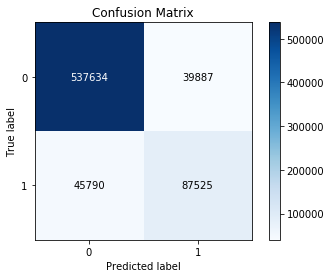

In [75]:
print('Confusion matrix:\n', skplt.metrics.plot_confusion_matrix(y_eval, gb_preds[:, 1].round()))

### Retrain Model on Full Dataset

Now that we have an idea of how the model performs, let's retrain on the full training set

In [53]:
full_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   user_id               object 
 1   MONTANT               float64
 2   FREQUENCE_RECH        float64
 3   REVENUE               float64
 4   ARPU_SEGMENT          float64
 5   FREQUENCE             float64
 6   DATA_VOLUME           float64
 7   ON_NET                float64
 8   ORANGE                float64
 9   TIGO                  float64
 10  REGULARITY            int64  
 11  FREQ_TOP_PACK         float64
 12  CHURN                 int64  
 13  REGION mean_target    float64
 14  TENURE mean_target    float64
 15  TOP_PACK mean_target  float64
dtypes: float64(13), int64(2), object(1)
memory usage: 262.9+ MB


In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               380127 non-null  object 
 1   MONTANT               247072 non-null  float64
 2   FREQUENCE_RECH        247072 non-null  float64
 3   REVENUE               252754 non-null  float64
 4   ARPU_SEGMENT          252754 non-null  float64
 5   FREQUENCE             252754 non-null  float64
 6   DATA_VOLUME           193087 non-null  float64
 7   ON_NET                241613 non-null  float64
 8   ORANGE                222897 non-null  float64
 9   TIGO                  153126 non-null  float64
 10  REGULARITY            380127 non-null  int64  
 11  FREQ_TOP_PACK         221348 non-null  float64
 12  REGION mean_target    230399 non-null  float64
 13  TENURE mean_target    380127 non-null  float64
 14  TOP_PACK mean_target  221346 non-null  float64
dtype

In [55]:
%%time 

xgb_full_pipeline.fit(full_tr.drop(['user_id', 'CHURN'], axis = 1), full_tr.CHURN)

None   # So we don't print out the whole pipeline representation

Wall time: 51min 26s


# GENERATING THE PREDICTIONS FOR THE TEST SET

In [56]:
gb_test_probas = xgb_full_pipeline.predict_proba(X_test.drop('user_id', axis = 1))
gb_test_probas

array([[9.9901515e-01, 9.8484824e-04],
       [9.2911798e-01, 7.0882007e-02],
       [9.9899328e-01, 1.0067223e-03],
       ...,
       [7.4767131e-01, 2.5232869e-01],
       [8.5740566e-01, 1.4259437e-01],
       [9.9062634e-01, 9.3736649e-03]], dtype=float32)

Let's load the submission file

In [57]:
submission_df = pd.read_csv('SampleSubmission.csv')
submission_df.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


We want to replace those 0s with our predictions. But first, we need to make sure that the rows of the submission file are in the same order as the test file. 

In [58]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test.index.values, 
                              submission_df.index.values)

If nothing happended after running the cell above, you can can safely drop in the estimated values in the 'CHURN' column.

In [59]:
# Save predictions to submission data frame
submission_df["CHURN"] = gb_test_probas[:, 1]

submission_df.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0.000985
1,000055d41c8a62052dd426592e8a4a3342bf565d,0.070882
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0.001007
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0.397649
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0.373433


#### Saving the predictions to a CSV file

In [60]:
submission_df.to_csv('mean_encode_XGB_submission2_final.csv', index=False)